In [1]:
import pandas as pd
import requests
import datetime as dt

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
pd.options.mode.chained_assignment = None # se desactiva advertencias de pandas por la edición_sobrescritura

In [3]:
df=pd.read_csv("datasource/annotations.csv")

In [4]:
df

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62017,validate,46,46_020807.wav,5399,1,559,40.73365,-73.98879,2018,42,...,-1,-1,0,0,0,0,1,0,0,0
62018,validate,46,46_020807.wav,5424,1,559,40.73365,-73.98879,2018,42,...,-1,-1,0,0,0,0,1,0,1,0
62019,validate,46,46_020853.wav,5337,1,559,40.73365,-73.98879,2018,34,...,far,-1,0,0,0,0,0,0,1,0
62020,validate,46,46_020853.wav,5365,1,559,40.73365,-73.98879,2018,34,...,-1,-1,0,0,0,0,0,0,0,0


In [5]:
noise_pollution=df

In [6]:
noise_pollution.columns

Index(['split', 'sensor_id', 'audio_filename', 'annotator_id', 'borough',
       'block', 'latitude', 'longitude', 'year', 'week', 'day', 'hour',
       '1-1_small-sounding-engine_presence',
       '1-2_medium-sounding-engine_presence',
       '1-3_large-sounding-engine_presence',
       '1-X_engine-of-uncertain-size_presence', '2-1_rock-drill_presence',
       '2-2_jackhammer_presence', '2-3_hoe-ram_presence',
       '2-4_pile-driver_presence',
       '2-X_other-unknown-impact-machinery_presence',
       '3-1_non-machinery-impact_presence', '4-1_chainsaw_presence',
       '4-2_small-medium-rotating-saw_presence',
       '4-3_large-rotating-saw_presence',
       '4-X_other-unknown-powered-saw_presence', '5-1_car-horn_presence',
       '5-2_car-alarm_presence', '5-3_siren_presence',
       '5-4_reverse-beeper_presence',
       '5-X_other-unknown-alert-signal_presence',
       '6-1_stationary-music_presence', '6-2_mobile-music_presence',
       '6-3_ice-cream-truck_presence',
       '6-X

In [7]:
noise_pollution=noise_pollution.replace(-1, 1)

noise_pollution['engine_sounds'] = noise_pollution[['1-1_small-sounding-engine_presence',
                                                    '1-2_medium-sounding-engine_presence',
                                                    '1-3_large-sounding-engine_presence',
                                                    '1-X_engine-of-uncertain-size_presence']].sum(axis=1)


noise_pollution['alarm_sounds']= noise_pollution[['5-1_car-horn_presence', '5-2_car-alarm_presence', '5-3_siren_presence',
                                                  '5-4_reverse-beeper_presence', '5-X_other-unknown-alert-signal_presence',
                                                  '6-1_stationary-music_proximity']].sum(axis=1)

C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_1176\17019683.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  noise_pollution['alarm_sounds']= noise_pollution[['5-1_car-horn_presence', '5-2_car-alarm_presence', '5-3_siren_presence',


In [8]:
noise_pollution=noise_pollution[['borough', 'year', 'week', 'day', 'hour', 'engine_sounds', 'alarm_sounds']]
noise_pollution['total_sounds']=noise_pollution[['engine_sounds','alarm_sounds']].sum(axis=1)
noise_pollution

,borough,year,week,day,hour,engine_sounds,alarm_sounds,total_sounds
0,1,2019,43,4,8,4,5,9
1,1,2019,43,4,8,1,5,6
2,1,2019,43,4,8,1,5,6
3,1,2019,43,4,8,4,5,9
4,1,2019,43,4,8,2,0,2
...,...,...,...,...,...,...,...,...
62017,1,2018,42,5,19,0,1,1
62018,1,2018,42,5,19,0,1,1
62019,1,2018,34,2,9,0,0,0
62020,1,2018,34,2,9,0,0,0


In [9]:
noise_pollution.columns=['id_borough','year','week','day','hour', 'engine_sounds', 'alarm_sounds', 'total_sounds']

noise_pollution['borough_name'] = noise_pollution['id_borough'].apply(lambda x:'brooklyn' if x == 2 else 
                                                                              ('manhattan' if x==1 else 
                                                                              ('queens'if x==3 else 
                                                                              ('staten_island' if x==5 else
                                                                              ('the_bronx' if x== 4 else None)))))
noise_pollution

,id_borough,year,week,day,hour,engine_sounds,alarm_sounds,total_sounds,borough_name
0,1,2019,43,4,8,4,5,9,manhattan
1,1,2019,43,4,8,1,5,6,manhattan
2,1,2019,43,4,8,1,5,6,manhattan
3,1,2019,43,4,8,4,5,9,manhattan
4,1,2019,43,4,8,2,0,2,manhattan
...,...,...,...,...,...,...,...,...,...
62017,1,2018,42,5,19,0,1,1,manhattan
62018,1,2018,42,5,19,0,1,1,manhattan
62019,1,2018,34,2,9,0,0,0,manhattan
62020,1,2018,34,2,9,0,0,0,manhattan


In [10]:
# mascara para graficas 1
sonidos=noise_pollution

sonidos1=sonidos.groupby(['year', 'borough_name'])['engine_sounds','alarm_sounds'].sum().reset_index()
sonidos1.head(2)

C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_1176\1675205556.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sonidos1=sonidos.groupby(['year', 'borough_name'])['engine_sounds','alarm_sounds'].sum().reset_index()


,year,borough_name,engine_sounds,alarm_sounds
0,2016,manhattan,1005,839
1,2017,manhattan,11721,9694


In [11]:
# mascara para graficas 2

sonidos['sounds_reducction']=sonidos['total_sounds']-sonidos['engine_sounds']


sonidos2=sonidos.groupby(['year', 'borough_name'])['total_sounds','sounds_reducction'].sum().reset_index()
sonidos2.head(2)


C:\Users\Jaime Ospino\AppData\Local\Temp\ipykernel_1176\939489648.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sonidos2=sonidos.groupby(['year', 'borough_name'])['total_sounds','sounds_reducction'].sum().reset_index()


,year,borough_name,total_sounds,sounds_reducction
0,2016,manhattan,1844,839
1,2017,manhattan,21415,9694


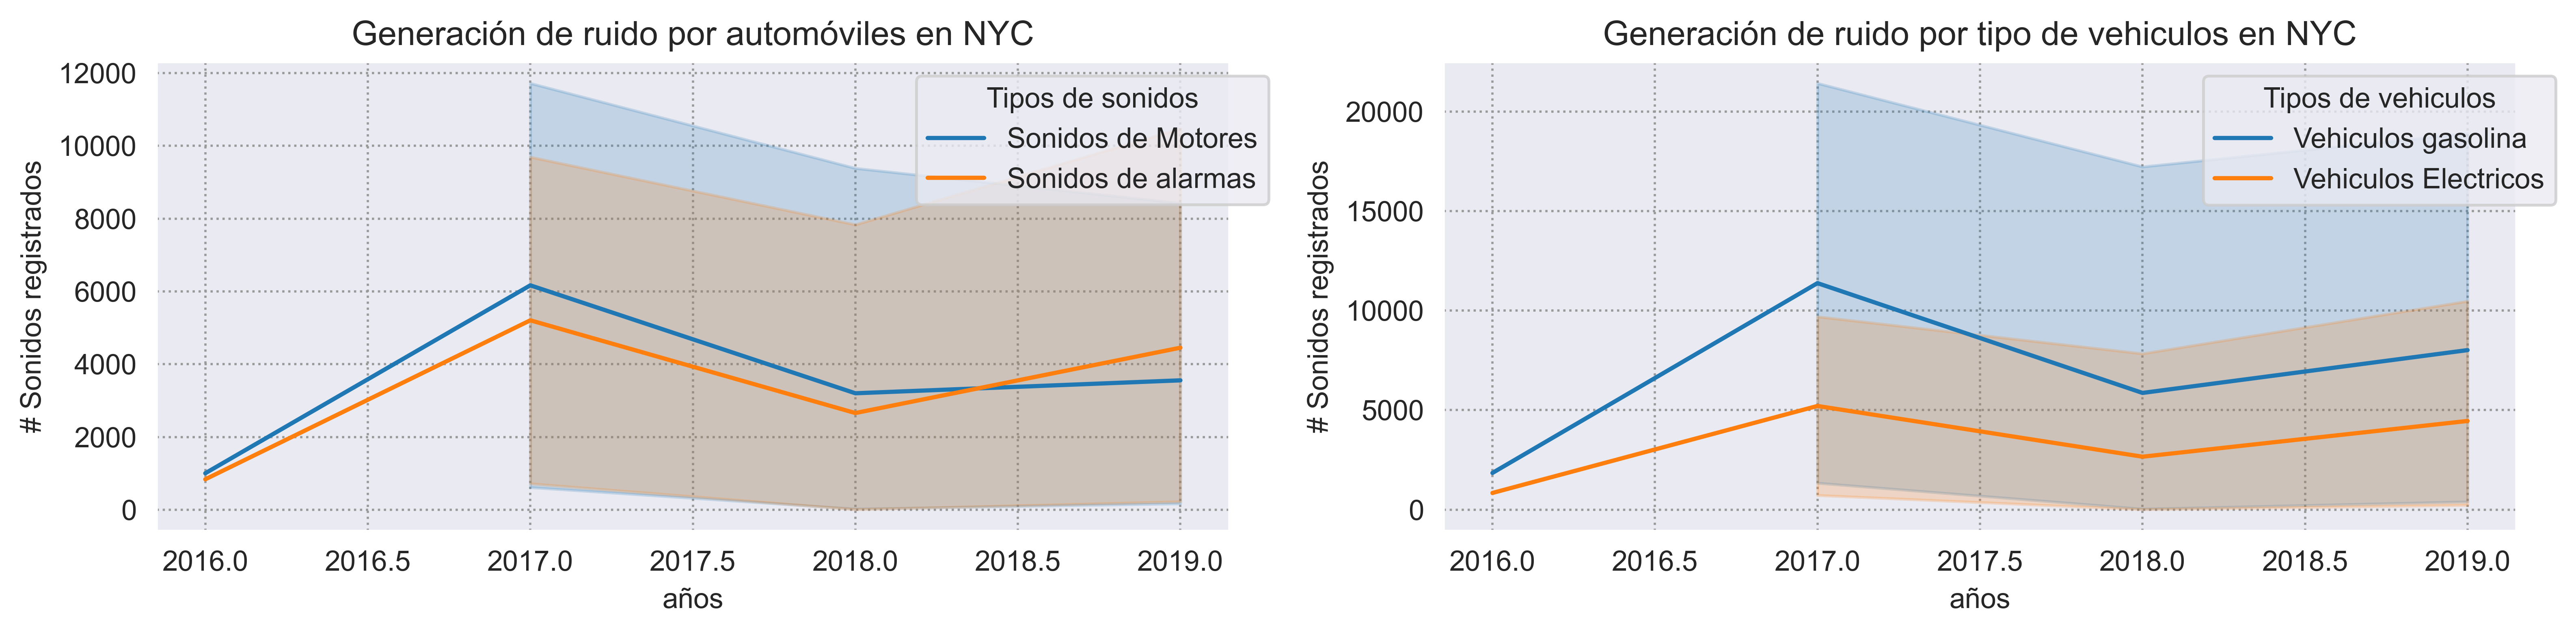

In [12]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"}) # Formato para el Backgound del grafico

fig, ax = plt.subplots(1, 2, figsize=(15,3),dpi=500)

#graf 1
sns.lineplot(x="year", y="engine_sounds", data=sonidos1,  ax=ax[0], palette="magma", label="Sonidos de Motores")
sns.lineplot(x="year", y="alarm_sounds", data=sonidos1,  palette="magma", ax=ax[0], label="Sonidos de alarmas")
# etiquetas & ejes
ax[0].set_xlabel('años')
ax[0].set_ylabel('# Sonidos registrados')
ax[0].set_title('Generación de ruido por automóviles en NYC')
# Leyenda
ax[0].legend(title='Tipos de sonidos', loc='upper right', bbox_to_anchor=(1.05, 1))

#graf 2

sns.lineplot(x="year", y="total_sounds", data=sonidos2,  ax=ax[1], palette="magma", label="Vehiculos gasolina")
sns.lineplot(x="year", y="sounds_reducction", data=sonidos2,  palette="magma", ax=ax[1], label="Vehiculos Electricos")

# etiquetas & ejes
ax[1].set_xlabel('años')
ax[1].set_ylabel('# Sonidos registrados')
ax[1].set_title('Generación de ruido por tipo de vehiculos en NYC')
# Leyenda
ax[1].legend(title='Tipos de vehiculos', loc='upper right', bbox_to_anchor=(1.05, 1))


plt.show()


Hay que ver que borough es más ruidoso

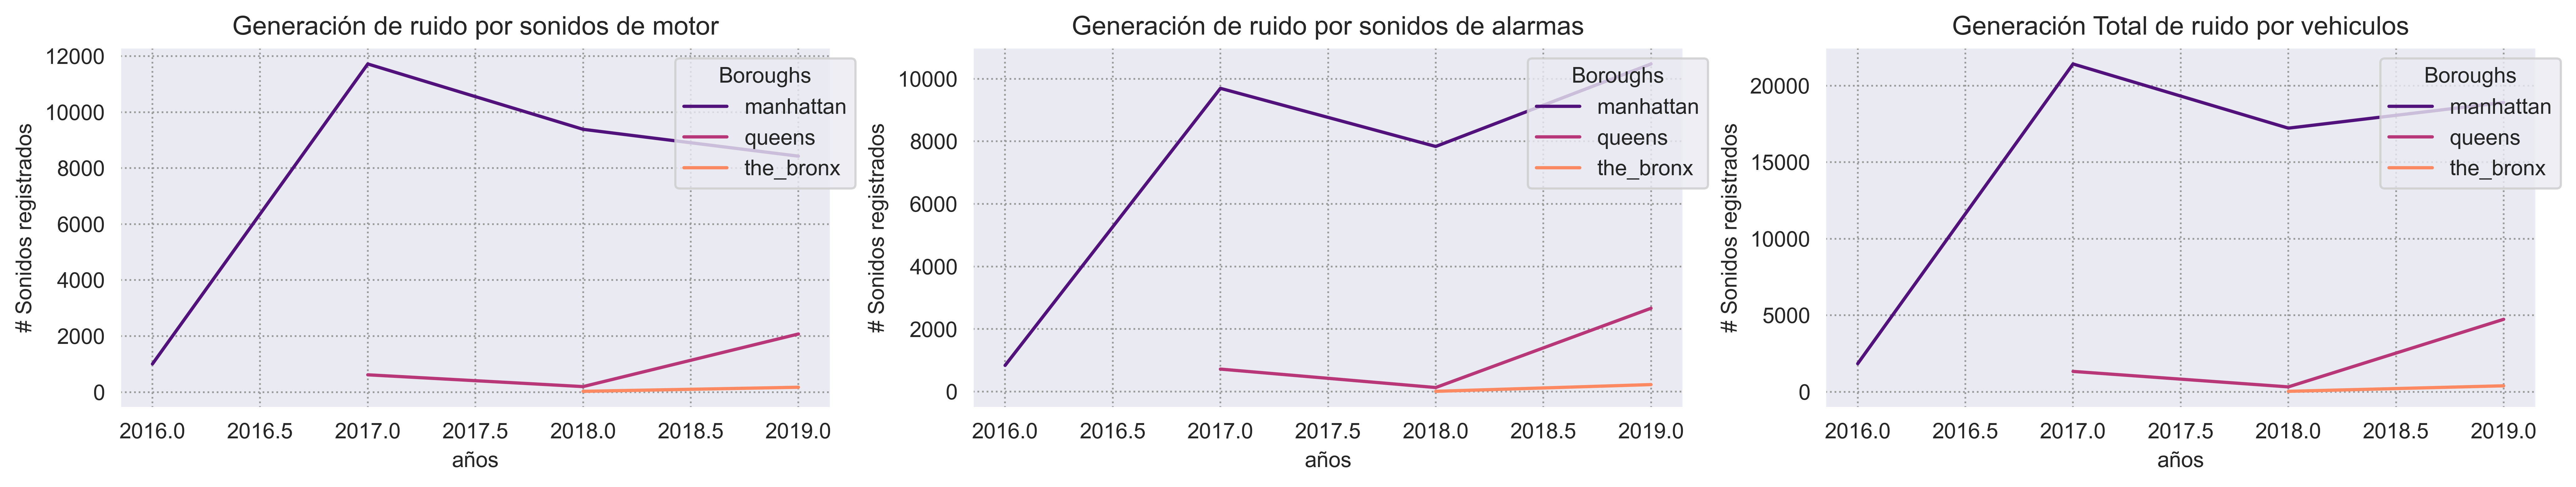

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(20,3),dpi=500)

#graf1

sns.lineplot(x="year", y="engine_sounds", data=sonidos1,  hue='borough_name', palette="magma", ax=ax[0])
# etiquetas & ejes
ax[0].set_xlabel('años')
ax[0].set_ylabel('# Sonidos registrados')
ax[0].set_title('Generación de ruido por sonidos de motor')
# Leyenda
ax[0].legend(title='Boroughs', loc='upper right', bbox_to_anchor=(1.05, 1))

#graf2
sns.lineplot(x="year", y="alarm_sounds", data=sonidos1,  hue='borough_name', palette="magma", ax=ax[1])
# etiquetas & ejes
ax[1].set_xlabel('años')
ax[1].set_ylabel('# Sonidos registrados')
ax[1].set_title('Generación de ruido por sonidos de alarmas')
# Leyenda
ax[1].legend(title='Boroughs', loc='upper right', bbox_to_anchor=(1.05, 1))

#graf3
sns.lineplot(x="year", y="total_sounds", data=sonidos2, hue='borough_name',  palette="magma", ax=ax[2])
# etiquetas & ejes
ax[2].set_xlabel('años')
ax[2].set_ylabel('# Sonidos registrados')
ax[2].set_title('Generación Total de ruido por vehiculos')
# Leyenda
ax[2].legend(title='Boroughs', loc='upper right', bbox_to_anchor=(1.05, 1))

plt.show()

El kpi sería.. la disminución de ruido por borough

In [14]:
sonidos2.head(3)

,year,borough_name,total_sounds,sounds_reducction
0,2016,manhattan,1844,839
1,2017,manhattan,21415,9694
2,2017,queens,1338,721


In [15]:
sonidos2['sounds_change_pct'] = (sonidos2['total_sounds'] - sonidos2['sounds_reducction']) / sonidos2['total_sounds'] * 100


In [16]:
sonidos2

,year,borough_name,total_sounds,sounds_reducction,sounds_change_pct
0,2016,manhattan,1844,839,54.501085
1,2017,manhattan,21415,9694,54.732664
2,2017,queens,1338,721,46.113602
3,2018,manhattan,17222,7836,54.500058
4,2018,queens,328,132,59.756098
5,2018,the_bronx,38,11,71.052632
6,2019,manhattan,18900,10473,44.587302
7,2019,queens,4740,2665,43.776371
8,2019,the_bronx,398,226,43.216080


In [23]:
sonidos2.groupby('borough_name')['sounds_change_pct'].mean().reset_index()


,borough_name,sounds_change_pct
0,manhattan,52.080277
1,queens,49.882024
2,the_bronx,57.134356


In [24]:
sonidos2.groupby('borough_name')['total_sounds'].mean().reset_index()

,borough_name,total_sounds
0,manhattan,14845.250000
1,queens,2135.333333
2,the_bronx,218.000000


Se importa el dataset de trafico vehicular

In [20]:
vehicular_volume=pd.read_csv("datasource/vehicular_volume.csv")

In [21]:
vehicular_volume

,date,id_borough,borough,volume
0,2008-03-10,3,queens,169.092233
1,2008-03-10,5,staten_island,399.421053
2,2008-03-11,3,queens,124.629902
3,2008-03-11,5,staten_island,335.104167
4,2008-03-12,3,queens,102.526961
...,...,...,...,...
13016,2020-11-18,3,queens,54.967903
13017,2020-11-19,3,queens,54.901338
13018,2020-11-20,3,queens,61.222529
13019,2020-11-21,3,queens,53.439159


In [22]:
vehicular_volume=vehicular_volume[['date','borough','volume']]
vehicular_volume['date']=pd.to_datetime(vehicular_volume['date']).dt.year
vehicular_volume=vehicular_volume.groupby(['borough']).volume.mean().reset_index()
vehicular_volume

,borough,volume
0,brooklyn,96.463480
1,manhattan,134.862131
2,queens,98.695875
3,staten_island,83.076206
4,the_bronx,132.184889


Se calcula con la relación el  % relacionando estan tres tablas. <br>

**volumen vehicular**<br>

| borough | volume |              
|---:|---|
| brooklyn | 96.463480 |
| manhattan | 134.862131 |
| queens | 98.695875 |
| staten_island | 83.076206 |
| the_bronx | 132.184889 |

**cambio porcentual borough (%)**<br>

| borough | sounds_pct (%)|
|---:|---|
| manhattan | 52.080277 |
| queens | 49.882024 |
| the_bronx | 57.134356 |

**sonidos totales borough**<br>

| borough | total_sounds |
|---:|---|
| manhattan | 14845 |
| queens | 2135 |
| the_bronx | 218 |

In [51]:

def kpi_manhattan(carros_electricos):
    volume_m = 135 * 4 * 24 #( 135 es 15 min.. se tiene en dia es decir: *4*24)
    sound_m = 14845         #(promedio de la suma de todos los sonidos totales de maner anual)
    sounds_ptc_m=0.52      #(cuanto baja al quitar los registros de los motores, carros electricos)
    
    new_volume_m=(volume_m-carros_electricos)
    new_sound_m=((new_volume_m*sound_m)/volume_m)*sounds_ptc_m
    Pctje_disminucion_m=(new_sound_m-sound_m)/sound_m
    
    return Pctje_disminucion_m

def kpi_queen(carros_electricos):
    volume_q = 99 * 4 * 24 
    sound_q = 2135        
    sounds_ptc_q=0.50      
    
    new_volume_q=(volume_q-carros_electricos)
    new_sound_q=((new_volume_q*sound_q)/volume_q)*sounds_ptc_q
    Pctje_disminucion_q=(new_sound_q-sound_q)/sound_q
    
    return Pctje_disminucion_q


def kpi_the_bronx(carros_electricos):
    
    volume_bx = 132 * 4 * 24 
    sound_bx = 218         
    sounds_ptc_bx=0.57     
    
    new_volume_bx=(volume_bx-carros_electricos)
    new_sound_bx=((new_volume_bx*sound_bx)/volume_bx)*sounds_ptc_bx
    Pctje_disminucion_bx=(new_sound_bx-sound_bx)/sound_bx
    
    return Pctje_disminucion_bx

def calcular_kpis(carros_electricos):
    kpi_m = kpi_manhattan(carros_electricos)
    kpi_q = kpi_queen(carros_electricos)
    kpi_bx =kpi_the_bronx(carros_electricos)
    
    indicador=f" {int(carros_electricos)} carros eléctricos disminuyen los registros de sonidos en | Manhattan {round(kpi_m*-100,2)}% | Queens {round(-100*kpi_q,2)}% |The Bronx {round(-100*kpi_bx,2)}% |"
    return indicador

In [52]:
calcular_kpis(212)

' 212 carros eléctricos disminuyen los registros de sonidos en | Manhattan 48.85% | Queens 51.12% |The Bronx 43.95% |'